In [45]:
# Імпорт потрібних бібліотек
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, LeakyReLU 
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adamax
# from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt
import numpy as np

In [19]:
# 1. ЗАВАНТАЖЕННЯ ТА ПЕРЕДОБРОБКА ДАНИХ
# Завантаження даних
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
# Масштабування даних (Нормалізація)
# Пікселі від 0 до 255, ділимо на 255, щоб отримати діапазон [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [20]:
# Перетворення міток класів у one-hot кодування (для класифікації з 10 класів)
num_classes = 10
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat = to_categorical(y_test, num_classes)

In [4]:
# 2. ВИЗНАЧЕННЯ КЛАСІВ ТА ПЕРЕВІРКА ДАНИХ
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

print(f"Розмір тренувальної вибірки: {x_train.shape}")
print(f"Розмір тестової вибірки: {x_test.shape}")
print(f"Кількість класів: {num_classes}")

Розмір тренувальної вибірки: (60000, 28, 28)
Розмір тестової вибірки: (10000, 28, 28)
Кількість класів: 10


In [6]:
# Базова модель
def build_model(units_1=256, units_2=128, dropout_rate=0.2):
    model = Sequential([
        # 1. Flatten: Перетворює зображення 28x28 у вектор 784
        Flatten(input_shape=(28, 28)), 
        
        # 2. Dense Layer 1: Перший прихований шар
        # Використовуємо ReLU як стандартну функцію активації для прихованих шарів
        Dense(units_1, activation='relu'),
        
        # 3. Dropout (Регуляризація): Запобігає перенавчанню
        Dropout(dropout_rate),
        
        # 4. Dense Layer 2: Другий прихований шар
        Dense(units_2, activation='relu'),
        
        # 5. Output Layer: Вихідний шар з 10 нейронами
        # Softmax: Використовується для багатокласової класифікації, 
        # повертає розподіл ймовірностей (сума = 1)
        Dense(num_classes, activation='softmax')
    ])
    return model

model = build_model()

# Компіляція моделі
# Оптимізатор Adam (надійно працює), функція втрат для one-hot кодування
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# 4. НАВЧАННЯ МОДЕЛІ
# Гіперпараметри для експериментів
EPOCHS = 20
BATCH_SIZE = 32 

history = model.fit(
    x_train, y_train_cat,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_split=0.1, # Використовуємо 10% тренувальних даних для валідації
    verbose=1
)

Epoch 1/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.8120 - loss: 0.5204 - val_accuracy: 0.8432 - val_loss: 0.4244
Epoch 2/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8534 - loss: 0.3973 - val_accuracy: 0.8578 - val_loss: 0.3781
Epoch 3/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8667 - loss: 0.3624 - val_accuracy: 0.8712 - val_loss: 0.3542
Epoch 4/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8739 - loss: 0.3426 - val_accuracy: 0.8677 - val_loss: 0.3632
Epoch 5/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.8799 - loss: 0.3239 - val_accuracy: 0.8790 - val_loss: 0.3281
Epoch 6/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8843 - loss: 0.3110 - val_accuracy: 0.8772 - val_loss: 0.3324
Epoch 7/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8878 - loss: 0.3020 - val_accuracy: 0.8792 - val_loss: 0.3392
Epoch 8/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.8896 - loss: 0


Точність на тестовій вибірці: 89.10%


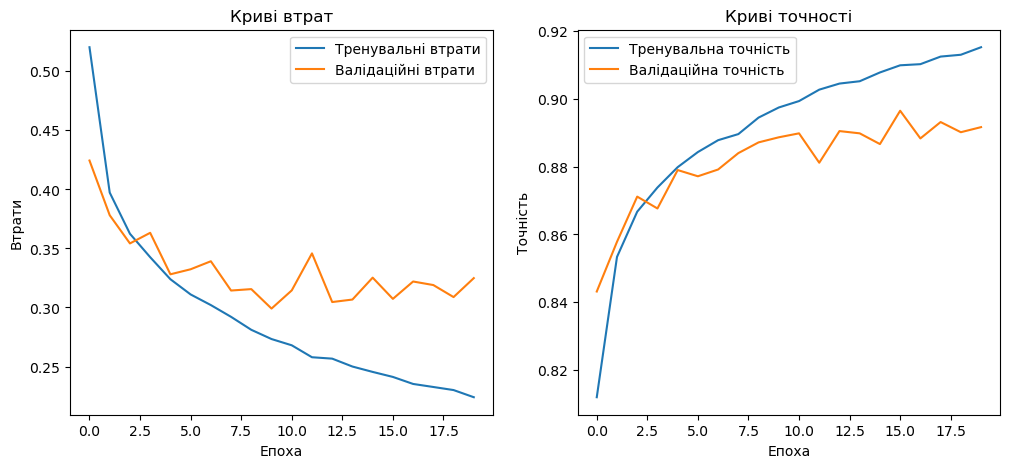

In [8]:
# 5. АНАЛІЗ РЕЗУЛЬТАТІВ
# Оцінка на тестовій вибірці
loss, accuracy = model.evaluate(x_test, y_test_cat, verbose=0)
print(f"\nТочність на тестовій вибірці: {accuracy*100:.2f}%")

# Побудова графіка кривих навчання (для виявлення Overfitting/Underfitting)
plt.figure(figsize=(12, 5))

# Графік втрат
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Тренувальні втрати')
plt.plot(history.history['val_loss'], label='Валідаційні втрати')
plt.title('Криві втрат')
plt.xlabel('Епоха')
plt.ylabel('Втрати')
plt.legend()

# Графік точності
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Тренувальна точність')
plt.plot(history.history['val_accuracy'], label='Валідаційна точність')
plt.title('Криві точності')
plt.xlabel('Епоха')
plt.ylabel('Точність')
plt.legend()

plt.show()

**5.1 Аналіз Кривих Навчання (Експеримент 1)**


**Результати тестування:** Точність на тестовій вибірці: 89.10%


*Аналіз графіків втрат і точності показує ключові тенденції навчання моделі:*

1. Криві Втрат (Loss)


**Тренувальні втрати (синя лінія):** Плавно і стабільно зменшуються протягом усіх 20 епох. Це свідчить про те, що оптимізатор Adam продовжує ефективно знаходити мінімум на тренувальному наборі.


**Валідаційні втрати (помаранчева лінія):** Різко падають до 5-ї епохи, а потім стають нестабільними, коливаючись навколо значення 0.30 - 0.35.


**Висновок:** Відсутність стабільного зменшення валідаційних втрат після ~8 епохи є чіткою ознакою поміркованого перенавчання (Overfitting). Модель починає "запам'ятовувати" шум тренувальних даних, замість того, щоб узагальнювати знання.

2. Криві Точності (Accuracy)


**Тренувальна точність (синя лінія):** Стабільно зростає, досягаючи понад ~91.5%.


**Валідаційна точність (помаранчева лінія):** Зростає до ~9-ї епохи, а потім вирівнюється, коливаючись у межах 88% - 89.5%.


**Розрив:** Наприкінці навчання спостерігається стійкий розрив (близько 2.5%) між тренувальною та валідаційною точністю. Це підтверджує, що модель має проблеми з узагальненням.

In [12]:
# 1. Оновлені ГІПЕРПАРАМЕТРИ

# Збільшуємо кількість епох, оскільки модель має сильнішу регуляризацію
EPOCHS = 30 
BATCH_SIZE = 32

# 2. ОНОВЛЕНА АРХІТЕКТУРА МОДЕЛІ (для боротьби з Overfitting)

# Ми збільшуємо кількість нейронів, щоб дати моделі більше потужності
# і одночасно посилюємо Dropout, щоб ця потужність не призвела до перенавчання.
def build_model(units_1=512, units_2=256, dropout_rate=0.4): # Змінено: units_1, units_2 та dropout_rate
    model = Sequential([
        # 1. Flatten
        Flatten(input_shape=(28, 28)), # Перетворюємо зображення 28x28 у вектор 784

        # 2. Dense Layer 1 (Збільшений розмір шару)
        Dense(units_1, activation='relu'), # units_1 = 512

        # 3. Dropout (Посилена Регуляризація)
        # Збільшення з 0.2 до 0.4 для сильнішої боротьби з перенавчанням
        Dropout(dropout_rate), # dropout_rate = 0.4

        # 4. Dense Layer 2 (Збільшений розмір шару)
        Dense(units_2, activation='relu'), # units_2 = 256

        # 5. Dropout
        Dropout(dropout_rate), # Другий шар Dropout

        # 6. Output Layer: Вихідний шар (10 класів)
        Dense(num_classes, activation='softmax')
    ])
    return model

# 3. КОМПІЛЯЦІЯ ТА НАВЧАННЯ

# Створення моделі з новими параметрами
model = build_model(units_1=512, units_2=256, dropout_rate=0.4)

# Компіляція моделі (залишається без змін)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Навчання моделі (збільшено EPOCHS)
history = model.fit(
    x_train, y_train_cat,
    epochs=EPOCHS, # EPOCHS = 30
    batch_size=BATCH_SIZE,
    validation_split=0.1,
    verbose=1
)

Epoch 1/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.7854 - loss: 0.5928 - val_accuracy: 0.8432 - val_loss: 0.4191
Epoch 2/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.8340 - loss: 0.4573 - val_accuracy: 0.8567 - val_loss: 0.3809
Epoch 3/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.8474 - loss: 0.4217 - val_accuracy: 0.8612 - val_loss: 0.3645
Epoch 4/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.8553 - loss: 0.4013 - val_accuracy: 0.8685 - val_loss: 0.3630
Epoch 5/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.8584 - loss: 0.3902 - val_accuracy: 0.8692 - val_loss: 0.3659
Epoch 6/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.8651 - loss: 0.3760 - val_accuracy: 0.8745 - val_loss: 0.3445
Epoch 7/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.8683 - loss: 0.3633 - val_accuracy: 0.8768 - val_loss: 0.3375
Epoch 8/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.8700 - lo


Точність на тестовій вибірці: 88.51%


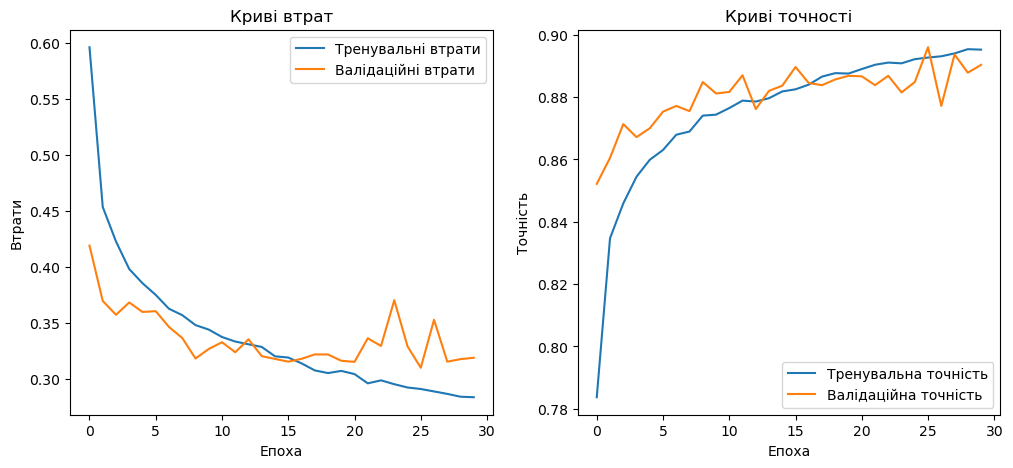

In [11]:
# АНАЛІЗ РЕЗУЛЬТАТІВ 
# Оцінка на тестовій вибірці
loss, accuracy = model.evaluate(x_test, y_test_cat, verbose=0)
print(f"\nТочність на тестовій вибірці: {accuracy*100:.2f}%")

# Побудова графіка кривих навчання (для виявлення Overfitting/Underfitting)
plt.figure(figsize=(12, 5))

# Графік втрат
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Тренувальні втрати')
plt.plot(history.history['val_loss'], label='Валідаційні втрати')
plt.title('Криві втрат')
plt.xlabel('Епоха')
plt.ylabel('Втрати')
plt.legend()

# Графік точності
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Тренувальна точність')
plt.plot(history.history['val_accuracy'], label='Валідаційна точність')
plt.title('Криві точності')
plt.xlabel('Епоха')
plt.ylabel('Точність')
plt.legend()

plt.show()

**5.2 Аналіз Кривих Навчання (Експеримент 2)**


**Гіперпараметри:** EPOCHS=30, Dropout=0.4, Шари=512, 256


**Результати тестування:** Точність на тестовій вибірці: 88.51%


*Аналіз графіків після посилення регуляризації:*


1. Оцінка Результату


***Точність на тестовій вибірці знизилася порівняно з першим експериментом (89.10%). Це вказує на те, що модель перейшла зі стану поміркованого перенавчання (Overfitting) у стан недонавчання (Underfitting).***


2. Криві Втрат (Loss)


**Тренувальні втрати:** Досягли дуже низького рівня (понад 0.28) до 30-ї епохи.


**Валідаційні втрати:** Залишилися дуже нестабільними та високими (коливаються близько 0.32-0.37).


**Висновок:** Високий показник Dropout (0.4) вніс надмірний шум у градієнтний спуск, що завадило моделі знайти глибокий, стабільний мінімум втрат на валідаційній вибірці.


3. Криві Точності (Accuracy)


**Тренувальна точність:** Застрягла на рівні ~89.5%, не демонструючи сильного росту, який був у першому експерименті (де досягала 91.5%).


**Валідаційна точність:** Вирівнялася близько 88.5%, підтверджуючи низький показник на тестовій вибірці.



In [80]:
# 1. Оновлені ГІПЕРПАРАМЕТРИ 

EPOCHS = 100 
BATCH_SIZE = 512 
DROPOUT_RATE = 0.2 # Трохи зменшуємо Dropout для вузьких шарів

# Визначення Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,      # Знизити швидкість навчання на 10%
    patience=5,      # Чекати 5 епох без покращення
    min_lr=1e-6,     # Мінімальна швидкість навчання
    verbose=1
)


# 2. ОНОВЛЕНА АРХІТЕКТУРА МОДЕЛІ 
# Збільшуємо глибину, зменшуючи ширину, щоб спробувати покращити узагальнення.
def build_deep_narrow_model(d_rate=DROPOUT_RATE):
    model = Sequential([
        # 1. Flatten
        Flatten(input_shape=(28, 28)),

        # 2. Dense Layer 1 (256) - Початковий шар зменшено
        Dense(256), 
        LeakyReLU(alpha=0.01), 
        Dropout(d_rate), 

        # 3. Dense Layer 2 (128) - Додано глибину
        Dense(128),
        LeakyReLU(alpha=0.01),
        Dropout(d_rate), 

        # 4. Dense Layer 3 (64) - Додано глибину
        Dense(64),
        LeakyReLU(alpha=0.01),
        Dropout(d_rate), 
        
        # 5. Output Layer: Вихідний шар (10 класів) - Softmax є обов'язковим для багатокласової класифікації
        Dense(num_classes, activation='softmax')
    ])
    return model


# 3. КОМПІЛЯЦІЯ ТА НАВЧАННЯ
# Створення моделі
model = build_deep_narrow_model()

# Компіляція моделі (Використовуємо оптимізатор Adamax)
model.compile(optimizer=Adamax(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Навчання моделі 
history = model.fit(
    x_train, y_train_cat,
    epochs=EPOCHS, 
    batch_size=BATCH_SIZE,
    validation_split=0.1,
    callbacks=[early_stopping, lr_scheduler], 
    verbose=1
)

Epoch 1/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - accuracy: 0.6376 - loss: 1.0500 - val_accuracy: 0.8000 - val_loss: 0.5531 - learning_rate: 0.0010
Epoch 2/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.7923 - loss: 0.6105 - val_accuracy: 0.8337 - val_loss: 0.4603 - learning_rate: 0.0010
Epoch 3/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.8208 - loss: 0.5184 - val_accuracy: 0.8538 - val_loss: 0.4195 - learning_rate: 0.0010
Epoch 4/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.8380 - loss: 0.4698 - val_accuracy: 0.8582 - val_loss: 0.3978 - learning_rate: 0.0010
Epoch 5/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.8463 - loss: 0.4394 - val_accuracy: 0.8643 - val_loss: 0.3804 - learning_rate: 0.0010
Epoch 6/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.8541 - loss: 0.4154 - val_accuracy: 0.8658 - val_loss: 0.3695 - learning_rate: 0.0010
Epoch 7/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.8606 - l


Точність на тестовій вибірці: 89.27%


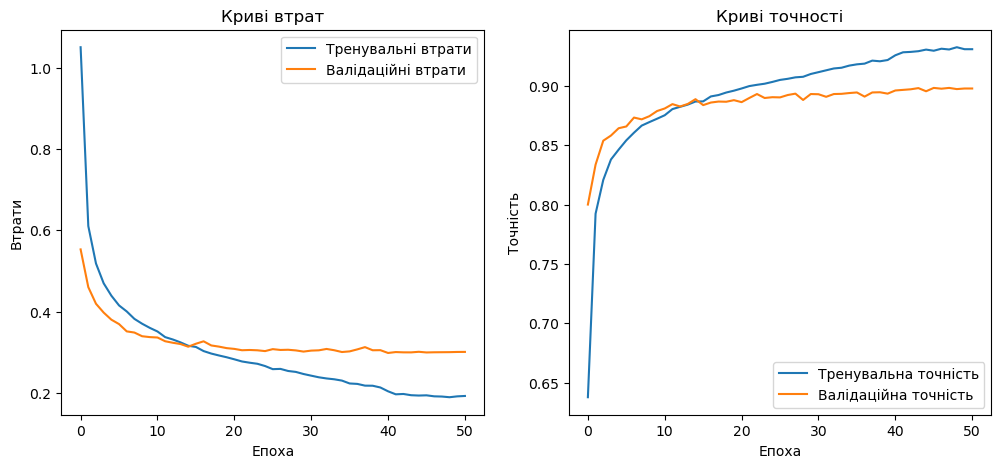

In [82]:
# АНАЛІЗ РЕЗУЛЬТАТІВ 
# Оцінка на тестовій вибірці
loss, accuracy = model.evaluate(x_test, y_test_cat, verbose=0)
print(f"\nТочність на тестовій вибірці: {accuracy*100:.2f}%")

# Побудова графіка кривих навчання (для виявлення Overfitting/Underfitting)
plt.figure(figsize=(12, 5))

# Графік втрат
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Тренувальні втрати')
plt.plot(history.history['val_loss'], label='Валідаційні втрати')
plt.title('Криві втрат')
plt.xlabel('Епоха')
plt.ylabel('Втрати')
plt.legend()

# Графік точності
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Тренувальна точність')
plt.plot(history.history['val_accuracy'], label='Валідаційна точність')
plt.title('Криві точності')
plt.xlabel('Епоха')
plt.ylabel('Точність')
plt.legend()

plt.show()

**Висновки за результатами Експерименту 13:** 

**Глибока та Вузька MLP**


1. Конфігурація моделі


**Архітектура:** Багатошаровий персептрон (MLP) з трьома прихованими шарами ($256 \to 128 \to 64$).


**Функція активації:** LeakyReLU в прихованих шарах.


**Регуляризація:** Dropout = 0.20 після кожного прихованого шару.


**Оптимізатор:** Adamax.


**Callbacks:** EarlyStopping (patience=10), ReduceLROnPlateau (patience=5).


**Розмір батчу:** BATCH_SIZE = 512

2. Аналіз та висновки


**Незначний приріст:** Зміна архітектури на глибшу та вужчу ($256 \to 128 \to 64$) з додатковими техніками регуляризації (LeakyReLU, Adamax, ReduceLROnPlateau) призвела лише до незначного покращення точності на тестовій вибірці: від $89.10\%$ до $89.27\%$. Це приріст лише $0.17\%$.


**Збільшення перенавчання (Overfitting):**


Базова модель мала розрив між тренувальною та валідаційною точністю близько $2.4\%$.


Експеримент 13 мав більший розрив, близько $3.2\%$. Це означає, що, незважаючи на додаткову регуляризацію, глибша мережа сильніше перенавчилася на тренувальному наборі.
